In [2]:
import os
import re

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

from hnetwork import HNetwork
from visualisation import *

In [58]:
def apply_noise(pattern, noise):
    noise = (np.random.random(size=pattern.shape) > noise) * 2 - 1
    return pattern * noise

In [553]:
n_patterns = 25
pattern_size = 6

In [554]:
img = Image.open('./data/custom/custom.png')
img_data = np.array(img.getdata())
img_data = np.where(img_data.mean(axis=1) > 125, 1, -1).reshape(5, -1)

In [586]:
patterns = []
for i in range(n_patterns):
    idx_start = i * pattern_size + 1
    idx_end = i * pattern_size + 1 + 5
    patterns.append(img_data[:, idx_start:idx_end])
X = np.array(patterns)

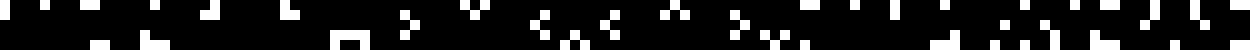

In [587]:
draw_dataset(X)

In [588]:
X.shape

(25, 5, 5)

In [589]:
hn = HNetwork(25, train_rule='oja', update_mode='async')
hn.fit(X.reshape(-1, 25), epochs=1000, verbose=0)

In [590]:
X.sum(axis=0)

array([[-13, -17, -19, -17, -13],
       [-17, -19, -23, -19, -17],
       [-19, -23, -25, -23, -19],
       [-17, -19, -23, -19, -17],
       [-13, -17, -19, -17, -13]])

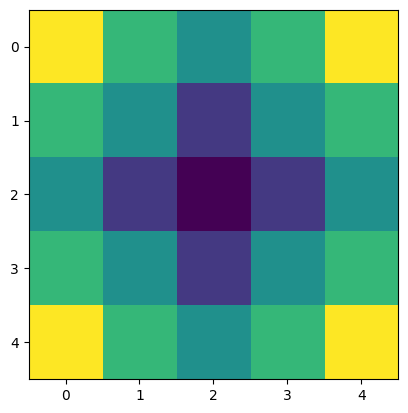

In [591]:
plt.imshow(X.sum(axis=0))

In [592]:
for i in range(n_patterns):
    x_noisy = apply_noise(X[i].reshape(25), 0)
    y_pred = hn.predict(x_noisy, epochs=20).reshape(5, 5)
    if np.sum(X[i] == y_pred) != 25:
        print(i)

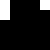

In [565]:
x_noisy = apply_noise(X[0].reshape(25), 0)
y_pred = hn.predict(x_noisy, epochs=10).reshape(5, 5)
draw_bitmap(x_noisy.reshape(5, 5))

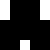

In [564]:
draw_bitmap(y_pred)